# AVANCE PRACTICA 1 EN EQUIPO

### Objetivo

 En esta actividad nos encargaremos de limpiar los datos de nuestra Base de Datos, que como ya lo hemos comentado anteriormente es de una BD que tiene informacion de Suicidios y contamos con algunas columnas las cuales las mas importantes para nosotros son la generacion y el lugar donde han ocurrido estos mismos, ya que nuestro objetivo principal es agruparlos y ver la clasificacion que se tiene en cuestion de generaciones para que de esta manera nos ayude a nosotros a poder saber cual de estas Generaciones ha sido más propensa a esta triste situacion y poder tomar accion, creando conciencia a futuras generaciones y hacer todo lo que este en nuestras manos para tomarlo como "foco rojo" a esta misma.
 
 Integrantes:
 
 * Mata Martínez Missael 		    1672902
 
 * Celestino Tovar Angel Gabriel 	1668653
 
 * López Sánchez Maribel            1672709

### Preguntas de interes

* Cuantos grupos de hombres y mujeres de generaciones millenial y Z se han suicidado?
* Tomando un registro de la BD, se puede saber como afecto el suicidio de la persona en la economia?
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios en todos los paises totales?

# Limpieza de datos

El primer paso sera importar librerias y utilizamos la libreria pandas para poder cargar archivos csv.

In [55]:
import matplotlib as plt
import seaborn as sn
import seaborn as sns
import numpy as np 
import pandas as pd 
import json
df = pd.read_csv("master.csv") 

Verificamos las dimensiones de la tabla

In [56]:
df.shape

(27820, 12)

Ahora visualizaremos la tabla con solamente 12 de sus filas de las 27820 que tiene

In [57]:
df.head(12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


A continuacion mostraremos los nombres y tipos de datos que tiene nuestra BD

In [58]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

De estas columnas solamente necesitaremos country, sex, suicides_no y generation. Ahora cambiaremos este nombre de las columnas al español

In [59]:
df = df.rename(columns = {'country':'Pais', 'sex':'Sexo', 'suicides_no':'NumeroDeSuicidios', 'generation':'Generacion', 'age': 'Edad'})
df.columns

Index(['Pais', 'year', 'Sexo', 'Edad', 'NumeroDeSuicidios', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'Generacion'],
      dtype='object')

Ahora, eliminaremos las filas que contengan datos nulos para quitar lo que no necesitamos. Nosotros lo hemos echo asi porque sabemos que las columnas de interes (PAIS, SEXO, NUMERO DE SUICIDIOS Y GENERACION) no se encuentran con ninguna celda vacia

In [60]:
df = df.dropna()

Ahora mostramos lo que hicimos

In [61]:
df

,Pais,year,Sexo,Edad,NumeroDeSuicidios,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),Generacion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Ahora eliminaremos todas las columnas que tengan datos nulos. Igual que en lo anterior, ya confirmamos que en nuestras columnas de interes no habia datos nulos.

In [62]:
df = df.dropna(axis=1)

Ahora mostraremos el resultado

In [63]:
df

,Pais,year,Sexo,Edad,NumeroDeSuicidios,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),Generacion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


A continuacion eliminaremos las columnas que no necesitamos. Para solo quedarnos con Pais, Sexo, NumeroDeSuicidios y Generacion, que son de nuestro interes

In [64]:
df_solopais = df.drop(['year', 'population', 'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'Edad'], axis=1)

In [65]:
df_solopais

,Pais,Sexo,NumeroDeSuicidios,Generacion
72,Albania,male,13,Generation X
73,Albania,male,9,Silent
74,Albania,female,2,G.I. Generation
75,Albania,female,13,Generation X
76,Albania,male,11,Generation X
...,...,...,...,...
27815,Uzbekistan,female,107,Generation X
27816,Uzbekistan,female,9,Silent
27817,Uzbekistan,male,60,Generation Z
27818,Uzbekistan,female,44,Generation Z


In [66]:
df_solopaisgraph = df_solopais.groupby('Generacion').agg({'NumeroDeSuicidios':'sum'})

In [67]:
df_solopaisgraph

,NumeroDeSuicidios
Generacion,
Boomers,435081
G.I. Generation,129523
Generation X,529371
Generation Z,7991
Millenials,242303
Silent,379755


Clasificando los suicidios por generación podemos ver que entre más joven es menos propenso a que se cometa un suicidio.

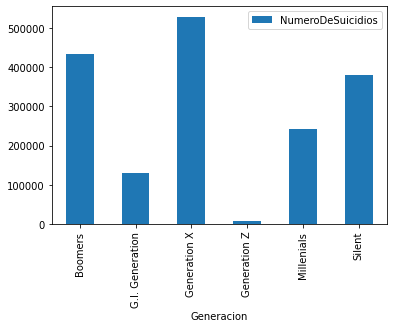

In [68]:
df_solopaisgraph.plot.bar(stacked=True)

In [69]:
df_genXpais = df_solopais.groupby(['Generacion', 'Pais']).agg({'NumeroDeSuicidios':'sum'})
df_genXpais

NumeroDeSuicidios
Generacion Pais                                   
Boomers    Albania                              31
           Antigua and Barbuda                   0
           Argentina                          4668
           Armenia                             146
           Australia                          4433
...                                            ...
Silent     United Arab Emirates                 10
           United Kingdom                     8634
           United States                     64013
           Uruguay                            1125
           Uzbekistan                          549

[525 rows x 1 columns]

Conociendo los indices de suicidios de hombres y mujeres mostraremos los resultados para saber quienes tuvieron el mayor.

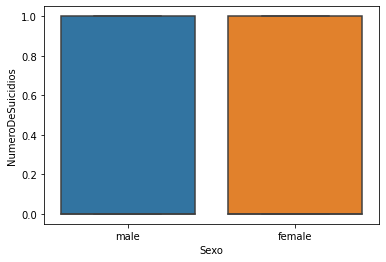

In [79]:
df = df[df.NumeroDeSuicidios.isin(df.NumeroDeSuicidios.value_counts().head(2).index)]

sns.boxplot(
    x='Sexo',
    y='NumeroDeSuicidios',
    data=df
)

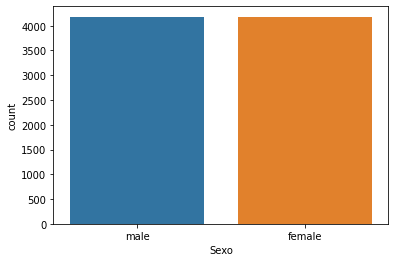

In [76]:
sns.countplot(df['Sexo'])

### Conclusion

Si bien, lo anterior aplicado fue la manera en la cual se debe a empezar a desarrollar mas el uso cognitivo sobre la investigacion de
nuestra BD, tomando en cuenta la eliminacion de columnas que no utilicemos ya se por funciones desconocidas o simplemente
datos que no son relevantes.
Las preguntas fueran replanteadas mas a fondo para dar a entender con mayor facilidad el tema que se esta tratando con la
informacion. Al final, fue la manera mas correcta de formularlas.